# Car Price Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
dataset = pd.read_csv('car_price.csv')
dataset.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [6]:
dataset.drop(columns = ['car_ID', 'symboling', 'CarName', 'aspiration', 'doornumber',
                        'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'curbweight',
                        'enginetype', 'fuelsystem', 'citympg', 'highwaympg'], inplace = True)

In [7]:
dataset.head(3)

,fueltype,carlength,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price
0,gas,168.8,64.1,48.8,four,130,3.47,2.68,9.0,111,5000,13495.0
1,gas,168.8,64.1,48.8,four,130,3.47,2.68,9.0,111,5000,16500.0
2,gas,171.2,65.5,52.4,six,152,2.68,3.47,9.0,154,5000,16500.0


In [8]:
dataset['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [9]:
dataset['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [10]:
# check the missing values
dataset.isnull().sum()

fueltype            0
carlength           0
carwidth            0
carheight           0
cylindernumber      0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
price               0
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   cylindernumber    205 non-null    object 
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  price             205 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 19.3+ KB


## Exploratory Data Analysis

In [13]:
# OneHot Encoding
en_data = dataset[['fueltype']]
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   fueltype_diesel  205 non-null    bool 
 1   fueltype_gas     205 non-null    bool 
dtypes: bool(2)
memory usage: 542.0 bytes


In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe = OneHotEncoder(drop = 'first')
arr = ohe.fit_transform(en_data).toarray()

In [16]:
dataset['fueltype_gas'] = pd.DataFrame(arr, columns = ['fueltype_gas'])

In [17]:
dataset.head(3)

,fueltype,carlength,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fueltype_gas
0,gas,168.8,64.1,48.8,four,130,3.47,2.68,9.0,111,5000,13495.0,1.0
1,gas,168.8,64.1,48.8,four,130,3.47,2.68,9.0,111,5000,16500.0,1.0
2,gas,171.2,65.5,52.4,six,152,2.68,3.47,9.0,154,5000,16500.0,1.0


In [18]:
dataset['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [19]:
cylinder_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

In [20]:
dataset['cylindernumber'] = dataset['cylindernumber'].map(cylinder_mapping)

In [21]:
dataset['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [22]:
dataset.drop(columns = ['fueltype'], inplace = True)
dataset.head(3)

,carlength,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fueltype_gas
0,168.8,64.1,48.8,4,130,3.47,2.68,9.0,111,5000,13495.0,1.0
1,168.8,64.1,48.8,4,130,3.47,2.68,9.0,111,5000,16500.0,1.0
2,171.2,65.5,52.4,6,152,2.68,3.47,9.0,154,5000,16500.0,1.0


In [23]:
dataset = dataset[[col for col in dataset.columns if col != 'price'] + ['price']]

In [24]:
dataset.head(3)

,carlength,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,fueltype_gas,price
0,168.8,64.1,48.8,4,130,3.47,2.68,9.0,111,5000,1.0,13495.0
1,168.8,64.1,48.8,4,130,3.47,2.68,9.0,111,5000,1.0,16500.0
2,171.2,65.5,52.4,6,152,2.68,3.47,9.0,154,5000,1.0,16500.0


KeyboardInterrupt: 

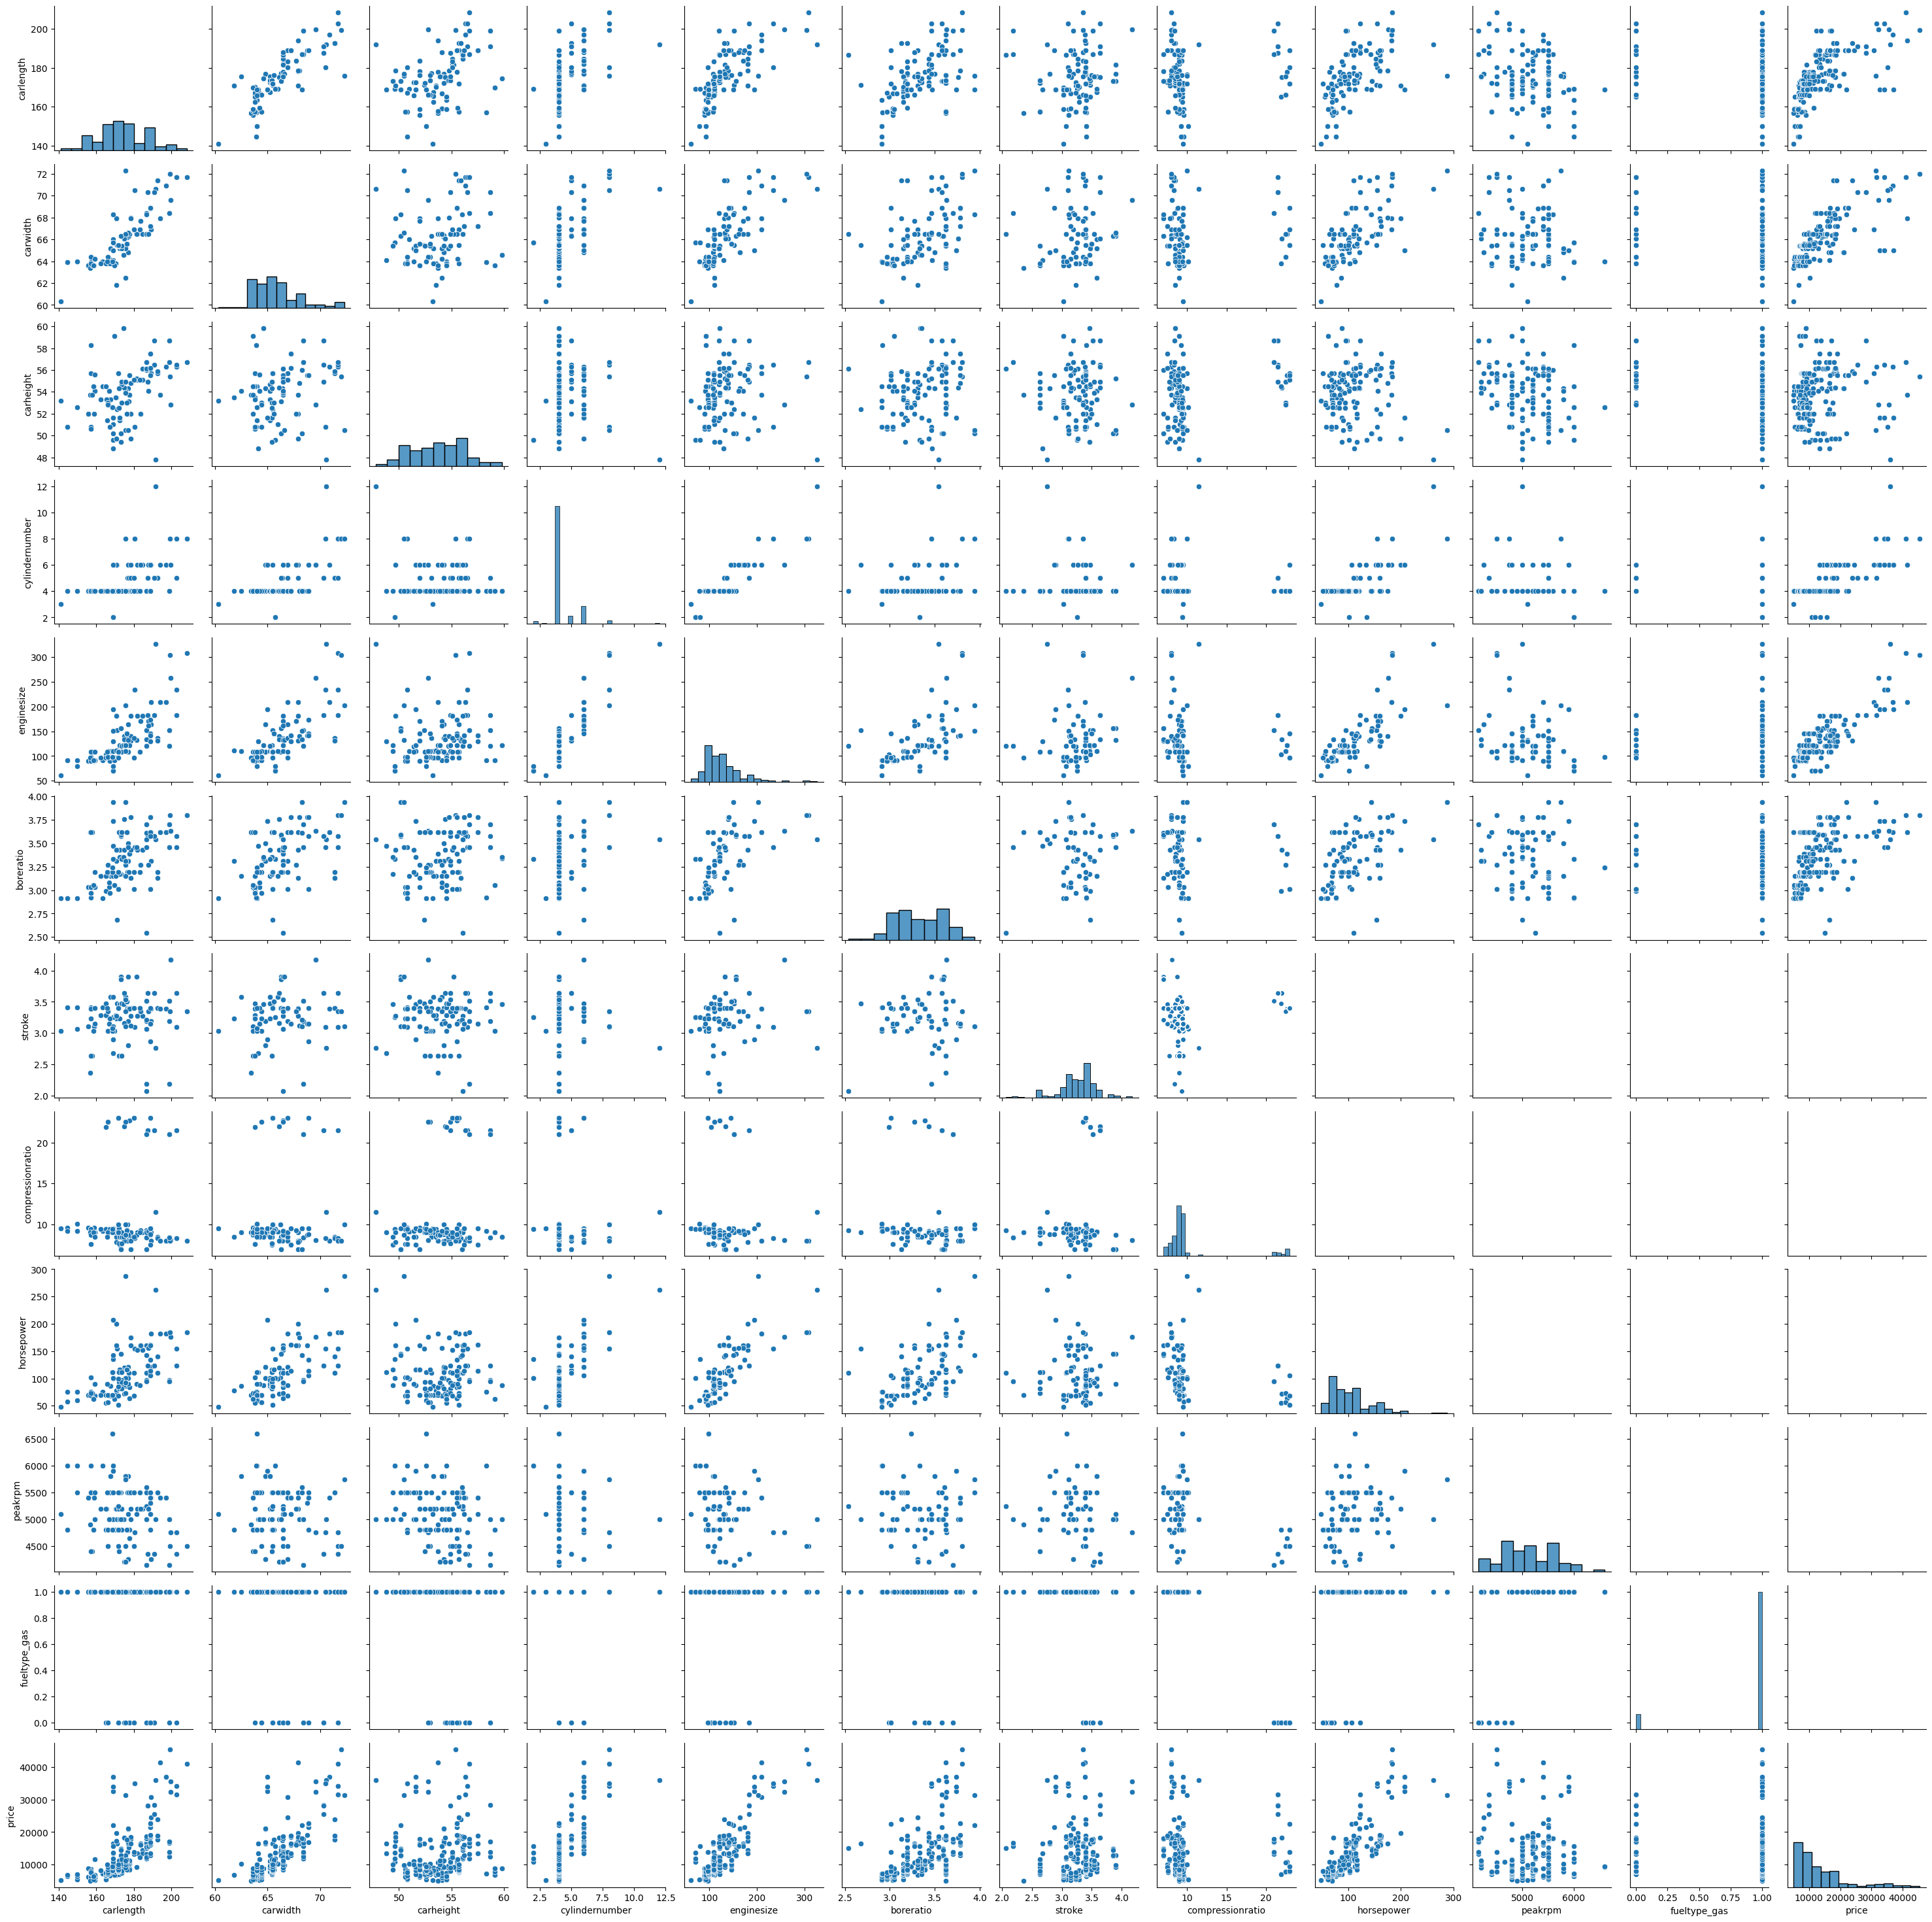

In [25]:
sns.pairplot(data = dataset)
plt.show()

In [26]:
dataset.corr()

,carlength,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,fueltype_gas,price
carlength,1.000000,0.841118,0.491029,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.212679,0.682920
carwidth,0.841118,1.000000,0.279210,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.233880,0.759325
carheight,0.491029,0.279210,1.000000,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.284631,0.119336
cylindernumber,0.430672,0.545007,-0.013995,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,0.024544,0.718305
enginesize,0.683360,0.735433,0.067149,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.069594,0.874145
boreratio,0.606454,0.559150,0.171071,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.054451,0.553173
stroke,0.129533,0.182942,-0.055307,0.008210,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.241829,0.079443
compressionratio,0.158414,0.181129,0.261214,-0.020002,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,-0.984356,0.067984
horsepower,0.552623,0.640732,-0.108802,0.692016,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,0.163926,0.808139
peakrpm,-0.287242,-0.220012,-0.320411,-0.124172,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,1.000000,0.476883,-0.085267


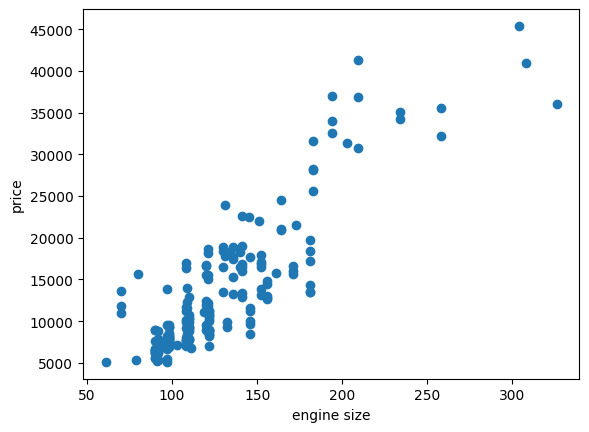

In [27]:
plt.scatter(dataset['enginesize'], dataset['price'])
plt.xlabel('engine size')
plt.ylabel('price')
plt.show()

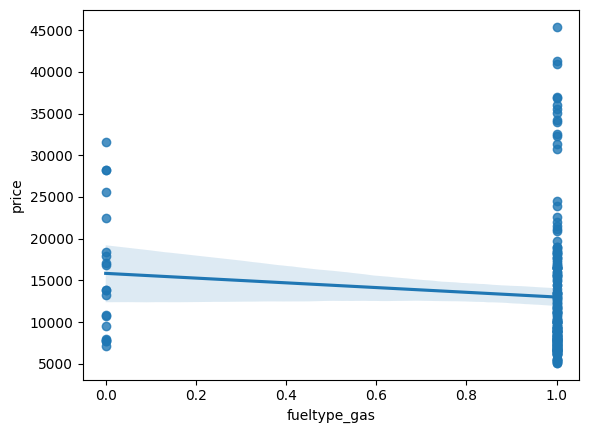

In [28]:
sns.regplot(x = 'fueltype_gas', y = 'price', data = dataset)
plt.show()

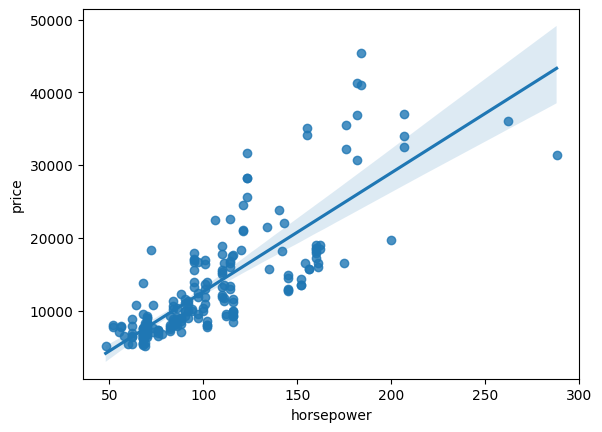

In [29]:
sns.regplot(x = 'horsepower', y = 'price', data = dataset)
plt.show()

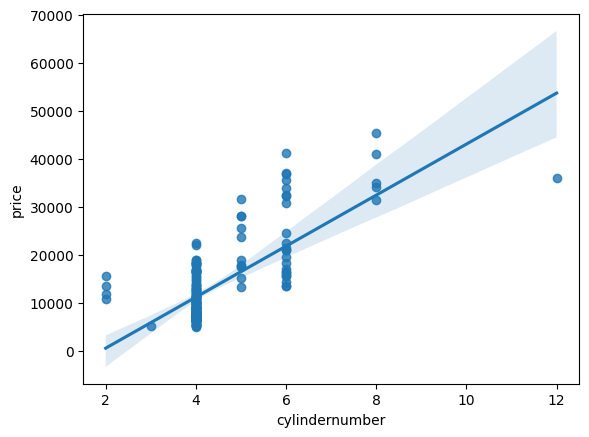

In [30]:
sns.regplot(x = 'cylindernumber', y = 'price', data = dataset)
plt.show()

In [31]:
dataset.shape

(205, 12)

In [32]:
dataset.duplicated().sum()

np.int64(4)

In [33]:
dataset.drop_duplicates(inplace = True)

In [34]:
dataset.shape

(201, 12)

In [35]:
x = dataset.iloc[:, :-1]
y = dataset['price']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
import pickle
pickle.dump(sc, open('scaling.pkl', 'wb'))

## Model Implementation

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
# print the coefficients and intercept
print(lr.coef_)

[ -194.46149925  1778.03259839   355.39469759 -1499.9494242
  6502.39927372  -939.95984467 -1348.29352068  -101.76494551
  1555.20390325   910.71372423  -656.12105555]


In [40]:
print(lr.intercept_)

13037.046875000005


In [41]:
# on which parameters the model has been trained
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
y_pred = lr.predict(x_test)

In [43]:
lr.score(x_test, y_test)

0.8112670790724834

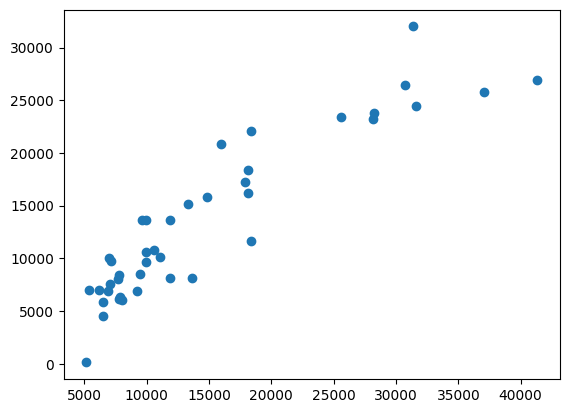

In [44]:
plt.scatter(y_test, y_pred)

In [45]:
# error
err = y_test - y_pred
err

97      1931.505960
15      4284.383487
30      1990.228660
162     2347.047580
132    -1742.965525
117     -243.996299
70      7171.054802
175      289.942270
179    -4896.813630
46       943.932932
67      2104.280893
187     1008.303993
169    -3602.511780
79      -361.711316
191    -1902.243885
182     -615.214369
57      5539.130679
156       -2.426480
83      -941.977546
69      4909.706349
128    11205.217101
16     14355.315623
152      670.067895
95      1687.424640
66      6687.240744
61      -199.827096
85     -3047.648272
68      4476.066238
129     -603.147622
136     1962.129984
9        650.014598
18      5035.356470
56      3739.130679
76     -1631.748738
154     1578.057824
106    -3697.077718
139     -471.178636
141    -2662.117863
168    -3952.511780
77      -831.748738
80      -679.119970
Name: price, dtype: float64

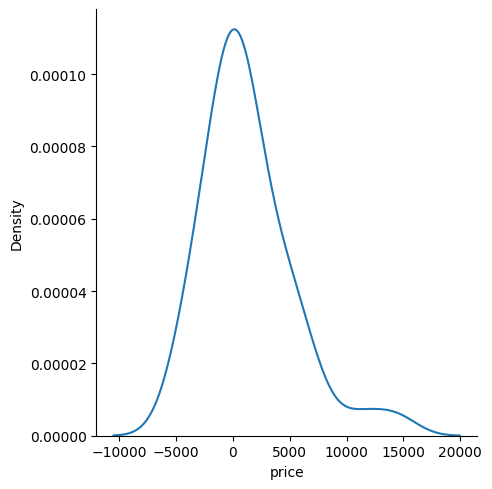

In [46]:
sns.displot(err, kind = 'kde')
plt.show()

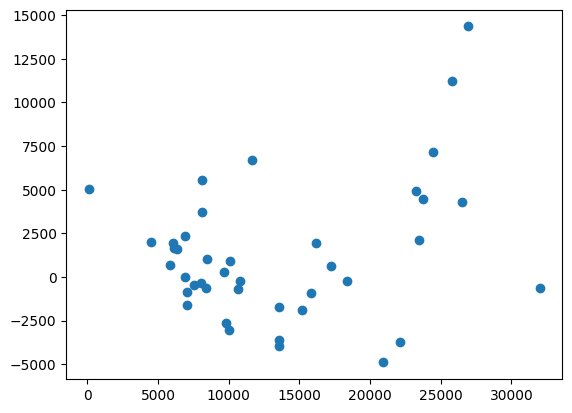

In [47]:
# plot with respect to pred and err
plt.scatter(y_pred, err)
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2845.1591868111127
16710860.22767464
4087.8919050868553


## Deployment

In [50]:
import pickle

In [73]:
with open('car_price_prediction.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [74]:
pickled_model = pickle.load(open('car_price_prediction.pkl', 'rb'))